In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

**Step 1: Load Dataset**

In [62]:
df= pd.read_csv("/sales_data_clean.csv")

In [63]:
df.head()

,Month,Product_A,Product_B,Product_C
0,Jan,120,80,50
1,Feb,150,60,70
2,Mar,130,90,60
3,Apr,170,100,80
4,May,160,110,70


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Month      12 non-null     object
 1   Product_A  12 non-null     int64 
 2   Product_B  12 non-null     int64 
 3   Product_C  12 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 516.0+ bytes


**Step 2: Data Cleaning & Preprocessing**

In [65]:
df.isnull().sum()

,0
Month,0
Product_A,0
Product_B,0
Product_C,0


**Step 3: Calculate Total Sales per Month**

In [66]:
df.fillna(0, inplace=True)

df.columns

Index(['Month', 'Product_A', 'Product_B', 'Product_C'], dtype='object')

In [67]:
df['Total_Sales'] = df[['Product_A','Product_B','Product_C']].sum(axis=1)
print(df[['Month','Total_Sales']])


   Month  Total_Sales
0    Jan          250
1    Feb          280
2    Mar          280
3    Apr          350
4    May          340
5    Jun          360
6    Jul          420
7    Aug          400
8    Sep          460
9    Oct          450
10   Nov          440
11   Dec          520


**Step 4: Average Sales per Product**

In [68]:
avg_sale = df[['Product_A', 'Product_B' ,'Product_C']].mean()
print("Average Sales per Product : \n" , avg_sale)

Average Sales per Product : 
 Product_A    184.166667
Product_B    110.000000
Product_C     85.000000
dtype: float64


**Step 5: Identify Peak and Lowest Sales Months**

In [69]:
max_month = df.loc[df['Total_Sales'].idxmax(), 'Month']
min_month = df.loc[df['Total_Sales'].idxmin(), 'Month']

print(f"Month with highest sales: {max_month}")
print(f"Month with lowest sales: {min_month}")


Month with highest sales: Dec
Month with lowest sales: Jan


**Step 6: Basic Forecasting for Next Month**

In [70]:
forecast = {}
for product in ['Product_A','Product_B','Product_C']:
    # Calculate average growth rate per month
    growth_rate = np.mean(np.diff(df[product]))
    forecast[product] = int(df[product].iloc[-1] + growth_rate)

# Forecast total sales
forecast['Total_Sales'] = sum(forecast.values())
print("Next Month Sales Forecast:", forecast)


Next Month Sales Forecast: {'Product_A': 261, 'Product_B': 156, 'Product_C': 126, 'Total_Sales': 543}


**Step 7: Month-over-Month Growth %**

In [71]:
for product in ['Product_A','Product_B','Product_C']:
  df[product + '_Growth%']=df[product].pct_change() *100

print(df)


   Month  Product_A  Product_B  Product_C  Total_Sales  Product_A_Growth%  \
0    Jan        120         80         50          250                NaN   
1    Feb        150         60         70          280          25.000000   
2    Mar        130         90         60          280         -13.333333   
3    Apr        170        100         80          350          30.769231   
4    May        160        110         70          340          -5.882353   
5    Jun        180         90         90          360          12.500000   
6    Jul        200        120        100          420          11.111111   
7    Aug        190        130         80          400          -5.000000   
8    Sep        210        140        110          460          10.526316   
9    Oct        230        120        100          450           9.523810   
10   Nov        220        130         90          440          -4.347826   
11   Dec        250        150        120          520          13.636364   

**Step 8: Visualization of Sales Trends**

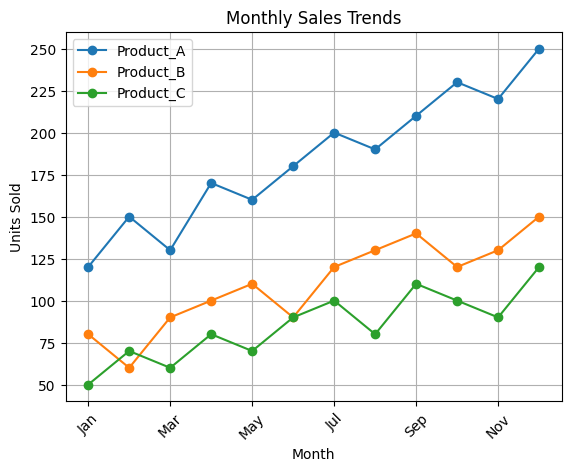

In [72]:
df.plot(x='Month' , y=['Product_A' ,'Product_B' ,'Product_C'] , marker='o')
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.xticks(rotation=45) # name position
plt.grid(True)
plt.show()

**Step 9: Correlation Analysis (Optional)**

In [73]:
correlation = df[['Product_A','Product_B','Product_C']].corr()
print("Correlation between products:\n", correlation)


Correlation between products:
            Product_A  Product_B  Product_C
Product_A   1.000000   0.834247   0.937633
Product_B   0.834247   1.000000   0.776250
Product_C   0.937633   0.776250   1.000000


**Step 10: Save Processed Dataset**

In [74]:
df.to_csv('/kaggle/processed_sales_data.csv', index=False)
print("Processed CSV saved as 'processed_sales_data.csv'")


Processed CSV saved as 'processed_sales_data.csv'


**Step 11: Optional Advanced Analysis**

Top 3 months for each product

In [75]:
for product in ['Product_A','Product_B','Product_C']:
    top_months = df.nlargest(3, product)[['Month', product]]
    print(f"Top 3 months for {product}:\n", top_months, "\n")


Top 3 months for Product_A:
    Month  Product_A
11   Dec        250
9    Oct        230
10   Nov        220 

Top 3 months for Product_B:
    Month  Product_B
11   Dec        150
8    Sep        140
7    Aug        130 

Top 3 months for Product_C:
    Month  Product_C
11   Dec        120
8    Sep        110
6    Jul        100 

